In [71]:
data <- read.csv(file.path("..","data","training_data.csv"))
data <- na.omit(data)
dim(data)
head(data)


[1]  708 4872

Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0


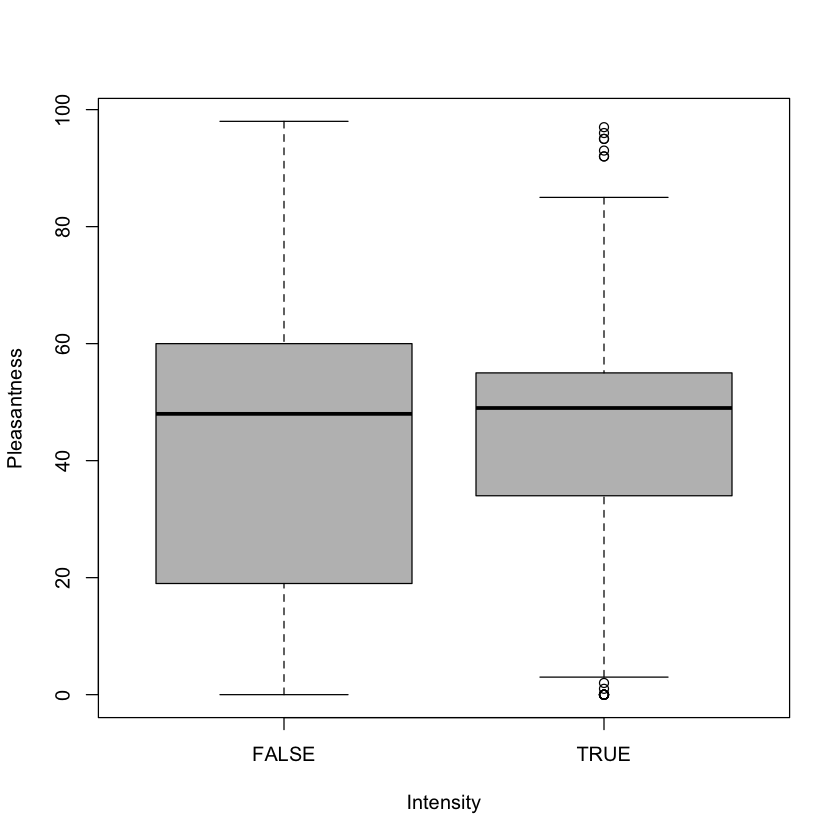

In [3]:
#plot pleasantness en fonction some features (intensity)

plot(data$Intensity, data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("FALSE","TRUE"))
#points((data$Intensity), data$VALENCE.PLEASANTNESS, pch=19)

interpretation : 

ERROR: Error in model.frame.default(formula = data$intensity ~ data$VALENCE.PLEASANTNESS, : type (NULL) incorrect pour la variable 'data$intensity'


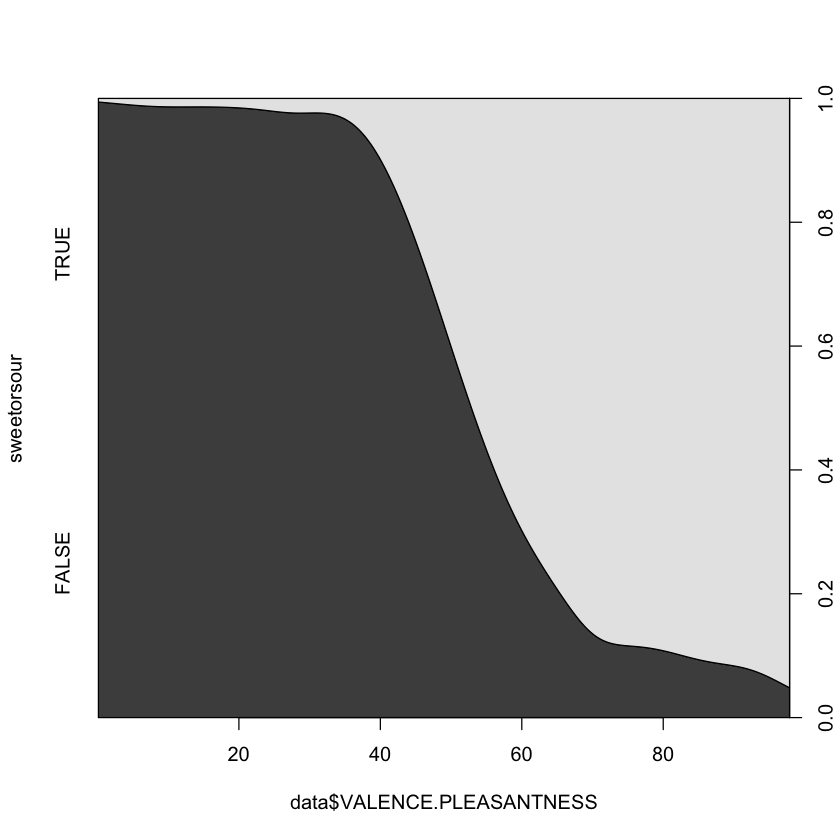

In [4]:
sweetorsour<- factor(data$SWEETORSOUR)
cdplot( sweetorsour ~ data$VALENCE.PLEASANTNESS)
#plot(data$SWEETORSOUR, data$VALENCE.PLEASANTNESS, xlab='Sweet or Sour', ylab='Pleasantness')

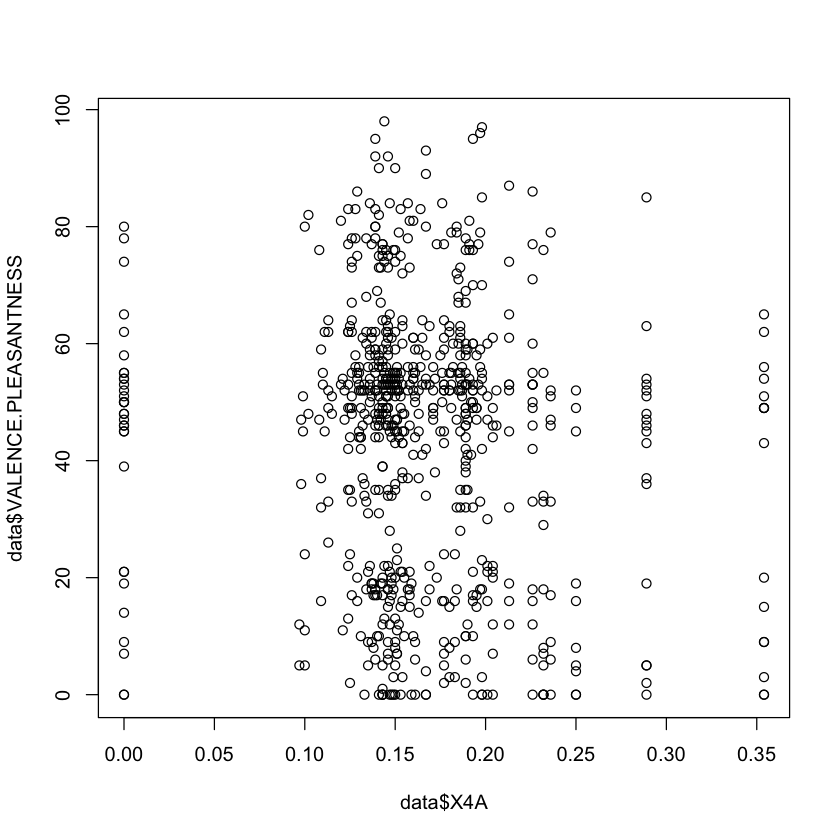

In [78]:

plot(data$X4A, data$VALENCE.PLEASANTNESS)

--> on peut voir que sweet or sour devient true quqnd pleasantness augmente . 

In [75]:
#tire des datas : bougeons les collones avec var = 0 and colonnea correlée  .
data <- data[, which(apply(data, 2, var)!=0)] 
#dim(data)
cormat<- cor(data)
seuil <- 0.7


c<- colnames(cormat)[!apply((lower.tri(cormat) & abs(cormat)>=seuil),2,any)]
data<-data[, c]
dim(data)
head(data)

Warning message in FUN(newX[, i], ...):
“NAs introduits lors de la conversion automatique”Warning message in FUN(newX[, i], ...):
“NAs introduits lors de la conversion automatique”

[1] 708 240

VALENCE.PLEASANTNESS,D.Dtr04,D.Dtr09,D.Dtr10,PJI2,Psi_e_1d,X3A,X4A,X5A,X5Av,...,DLS_07,DLS_cons,LLS_01,LLS_02,Depressant.80,Hypertens.80,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
45,29.122,0,0,1.0,0.001,0.173,0.111,0.069,0.048,...,1,1.00,0.67,1,0,1,1,0,1,0
49,0.000,0,0,1.0,-0.048,0.226,0.145,0.098,0.031,...,1,0.84,1.00,1,0,0,0,0,0,0
56,0.000,0,0,1.0,0.000,0.198,0.135,0.091,0.025,...,1,0.87,0.67,1,1,1,1,0,1,1
7,0.000,0,0,0.5,-0.414,0.333,0.000,0.000,0.000,...,1,0.95,1.00,1,0,0,0,0,0,0
51,0.000,0,0,1.0,0.026,0.221,0.145,0.101,0.037,...,1,0.84,1.00,1,0,0,0,0,0,0
21,0.000,0,0,1.0,0.002,0.234,0.153,0.106,0.042,...,1,0.95,0.83,1,0,0,1,0,1,0


Warning message:
“In prcomp.default(data.sc, data = F) :
 extra argument ‘data’ will be disregarded”

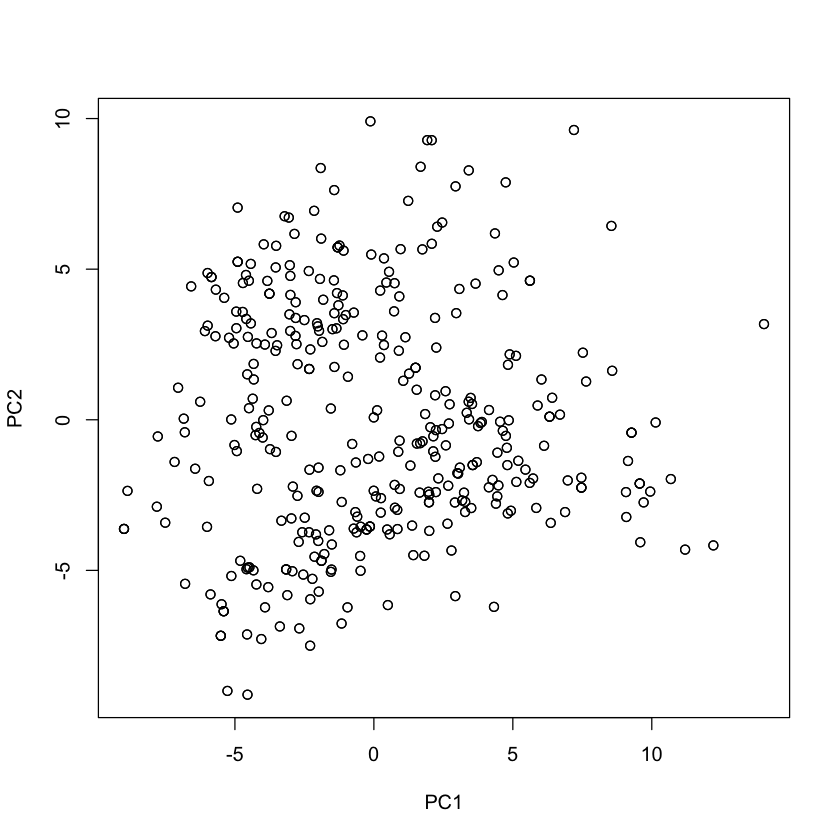

In [69]:
data.sc <- scale(data[, -1]) #remove  prediction data()
pca <- prcomp(data.sc, data= F)
plot(pca$x[,1:2])

In [70]:
s <- svd(data.sc)
sum((s$v - pca$rotation)^2)
sum((s$u %*% diag(s$d) - pca$x)^2)

[1] 4.271386e-25

[1] 2.175052e-22